# Exploratory Data Analysis

In [1]:
# Import library
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

print('numpy version :', np.__version__)
print('pandas version :', pd.__version__)
print('seaborn version :', sns.__version__)

numpy version : 1.24.3
pandas version : 2.1.4
seaborn version : 0.13.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load Data

In [3]:
df = pd.read_csv('train.csv')
df.sample(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
59228,T1059229,60,S1,L5,R2,2018-06-12,0,No,20,13137.00
1246,T1001247,330,S4,L2,R1,2018-01-04,0,Yes,83,62265.00
64208,T1064209,133,S1,L1,R4,2018-06-25,0,No,25,15459.00
33409,T1033410,326,S3,L1,R1,2018-04-02,0,No,49,28767.00
181264,T1181265,25,S1,L3,R1,2019-05-12,0,Yes,83,53250.00
161188,T1161189,220,S2,L4,R3,2019-03-18,0,No,40,24942.00
33187,T1033188,242,S4,L1,R1,2018-04-01,1,Yes,119,61876.44
89475,T1089476,202,S4,L2,R2,2018-09-03,1,Yes,69,50478.00
137092,T1137093,215,S3,L2,R1,2019-01-11,0,No,86,68751.00
63088,T1063089,18,S4,L1,R1,2018-06-22,0,Yes,105,66429.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [4]:
# Convert 'Holiday' to boolean format
df['Holiday'] = df['Holiday'].astype(bool)

# Group into two feature sets
num = ['#Order', 'Sales']
cat = ['Store_Type', 'Location_Type', 'Region_Code', 'Discount', 'Holiday']

In [5]:
df[num].describe()

,#Order,Sales
count,188340.000000,188340.000000
mean,68.205692,42784.327982
std,30.467415,18456.708302
min,0.000000,0.000000
25%,48.000000,30426.000000
50%,63.000000,39678.000000
75%,82.000000,51909.000000
max,371.000000,247215.000000


In [6]:
df[cat].describe()

,Store_Type,Location_Type,Region_Code,Discount,Holiday
count,188340,188340,188340,188340,188340
unique,4,5,4,2,2
top,S1,L1,R1,No,False
freq,88752,85140,63984,104051,163520


In [8]:
# Count the occurrences of each value in the categorical features
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())

Value count kolom Store_Type:
Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: count, dtype: int64
Value count kolom Location_Type:
Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64
Value count kolom Region_Code:
Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: count, dtype: int64
Value count kolom Discount:
Discount
No     104051
Yes     84289
Name: count, dtype: int64
Value count kolom Holiday:
Holiday
False    163520
True      24820
Name: count, dtype: int64


In [9]:
# Check the unique values in each column
unique_values = df.nunique()
print("\nNumber of unique values in each column:")
print(unique_values)


Number of unique values in each column:
ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64


In [11]:
# Check if there are any columns with missing values
missing_values = df.isnull().sum()
print("Missing values di setiap kolom:")
print(missing_values)

Missing values di setiap kolom:
ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64


# Sales Analysis

## Average Sales During Holidays and Discount periods


/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_56747/2595393842.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Holiday', y='Sales', data=sales_by_holiday, palette=holiday_colors, ax=axes[1])


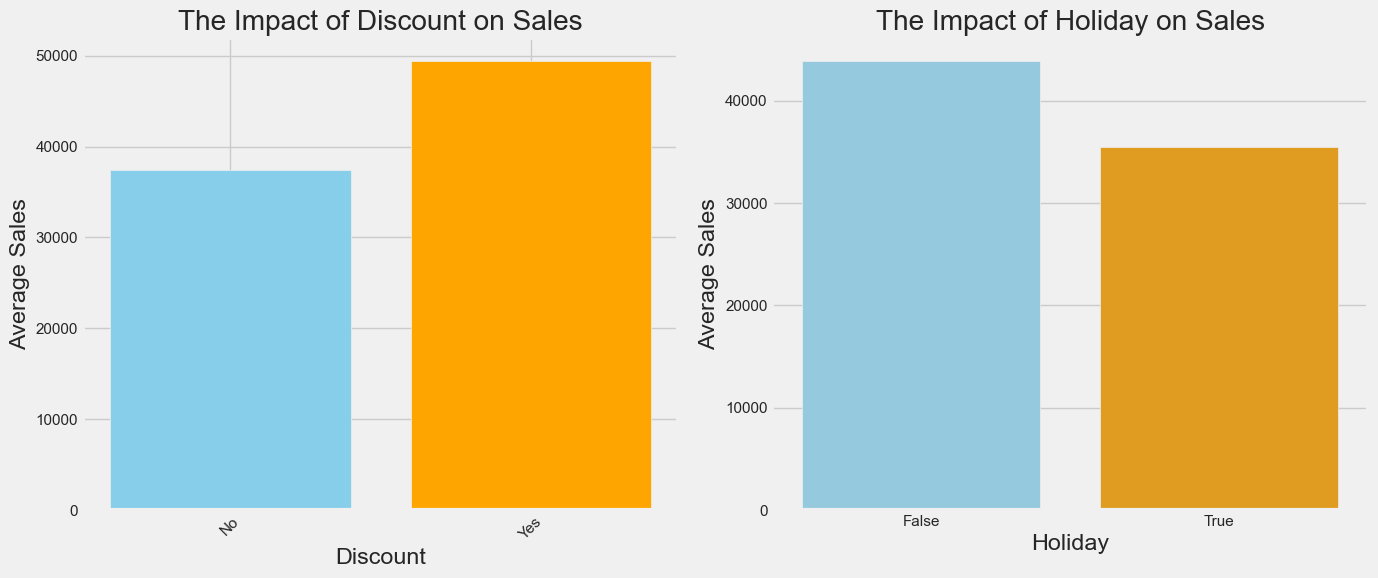

In [12]:
# Group by 'Discount' and calculate avg of 'Sales'
sales_by_discount = df.groupby('Discount')['Sales'].mean().reset_index()

# Group by 'Holiday' and calculate avg of 'Sales'
sales_by_holiday = df.groupby('Holiday')['Sales'].mean().reset_index()

# Define colors
discount_colors = ['skyblue' if discount == 'No' else 'orange' for discount in sales_by_discount['Discount']]
holiday_colors = ['skyblue' if holiday == 0 else 'orange' for holiday in sales_by_holiday['Holiday']]

# Plotting side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting average sales by discount
axes[0].bar(sales_by_discount['Discount'], sales_by_discount['Sales'], color=discount_colors)
axes[0].set_xlabel('Discount')
axes[0].set_ylabel('Average Sales')
axes[0].set_title('The Impact of Discount on Sales')
axes[0].tick_params(axis='x', rotation=45)

# Plotting average sales by holiday
sns.barplot(x='Holiday', y='Sales', data=sales_by_holiday, palette=holiday_colors, ax=axes[1])
axes[1].set_title('The Impact of Holiday on Sales')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Average Sales')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


##### Insights: 
Despite the common assumption that holidays drive a surge in sales, data reveals that WOMart's average sales during holiday periods remain relatively consistent with non-holiday times. Instead, it’s the level of discounts that significantly impacts sales performance. Higher discount levels show a clear positive correlation with increased sales, suggesting that targeted promotional strategies are more effective in boosting revenue than relying on holiday shopping periods alone. 

## Monthly Sales Trend 

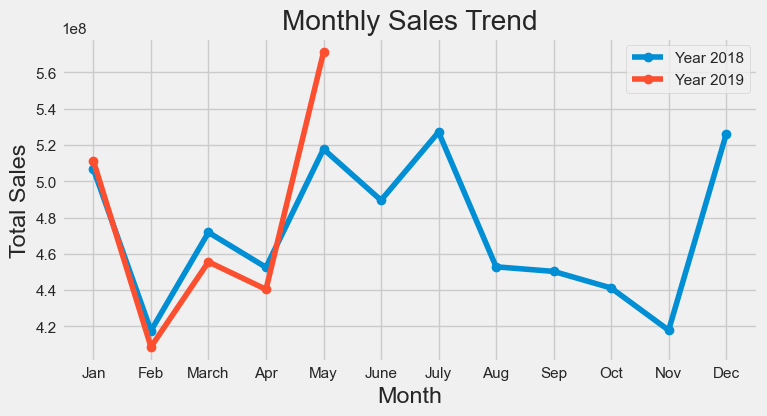

In [16]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Add day, month, and year columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Dictionary to map month numbers to month names
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'March', 4: 'Apr',
    5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Convert month numbers to month names
df['Month'] = df['Month'].map(month_map)

# Group data by year and month, and calculate total sales
grouped1 = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Define the order of months
month_order = ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'Month' column to categorical with specified order
grouped1['Month'] = pd.Categorical(grouped1['Month'], categories=month_order, ordered=True)

# Create a plot for each year
plt.figure(figsize=(8, 4))
years = grouped1['Year'].unique()
for year in years:
    subset = grouped1[grouped1['Year'] == year]
    # Sort by 'Month' to ensure correct ordering
    subset = subset.sort_values('Month')
    plt.plot(subset['Month'], subset['Sales'], marker='o', label=f'Year {year}')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.legend()
plt.grid(True)
plt.show()

#### Insights:
Sales trends over an 18-month period reveal pronounced peaks in January, May, and December, indicating significant seasonal influences or marketing impacts during these months. In contrast, February and November experience notable declines in sales, suggesting seasonal slowdowns or reduced consumer activity during these times. These patterns highlight the need to adapt sales strategies and marketing efforts to align with these cyclical trends for optimal performance.


## Weekly Sales Trend

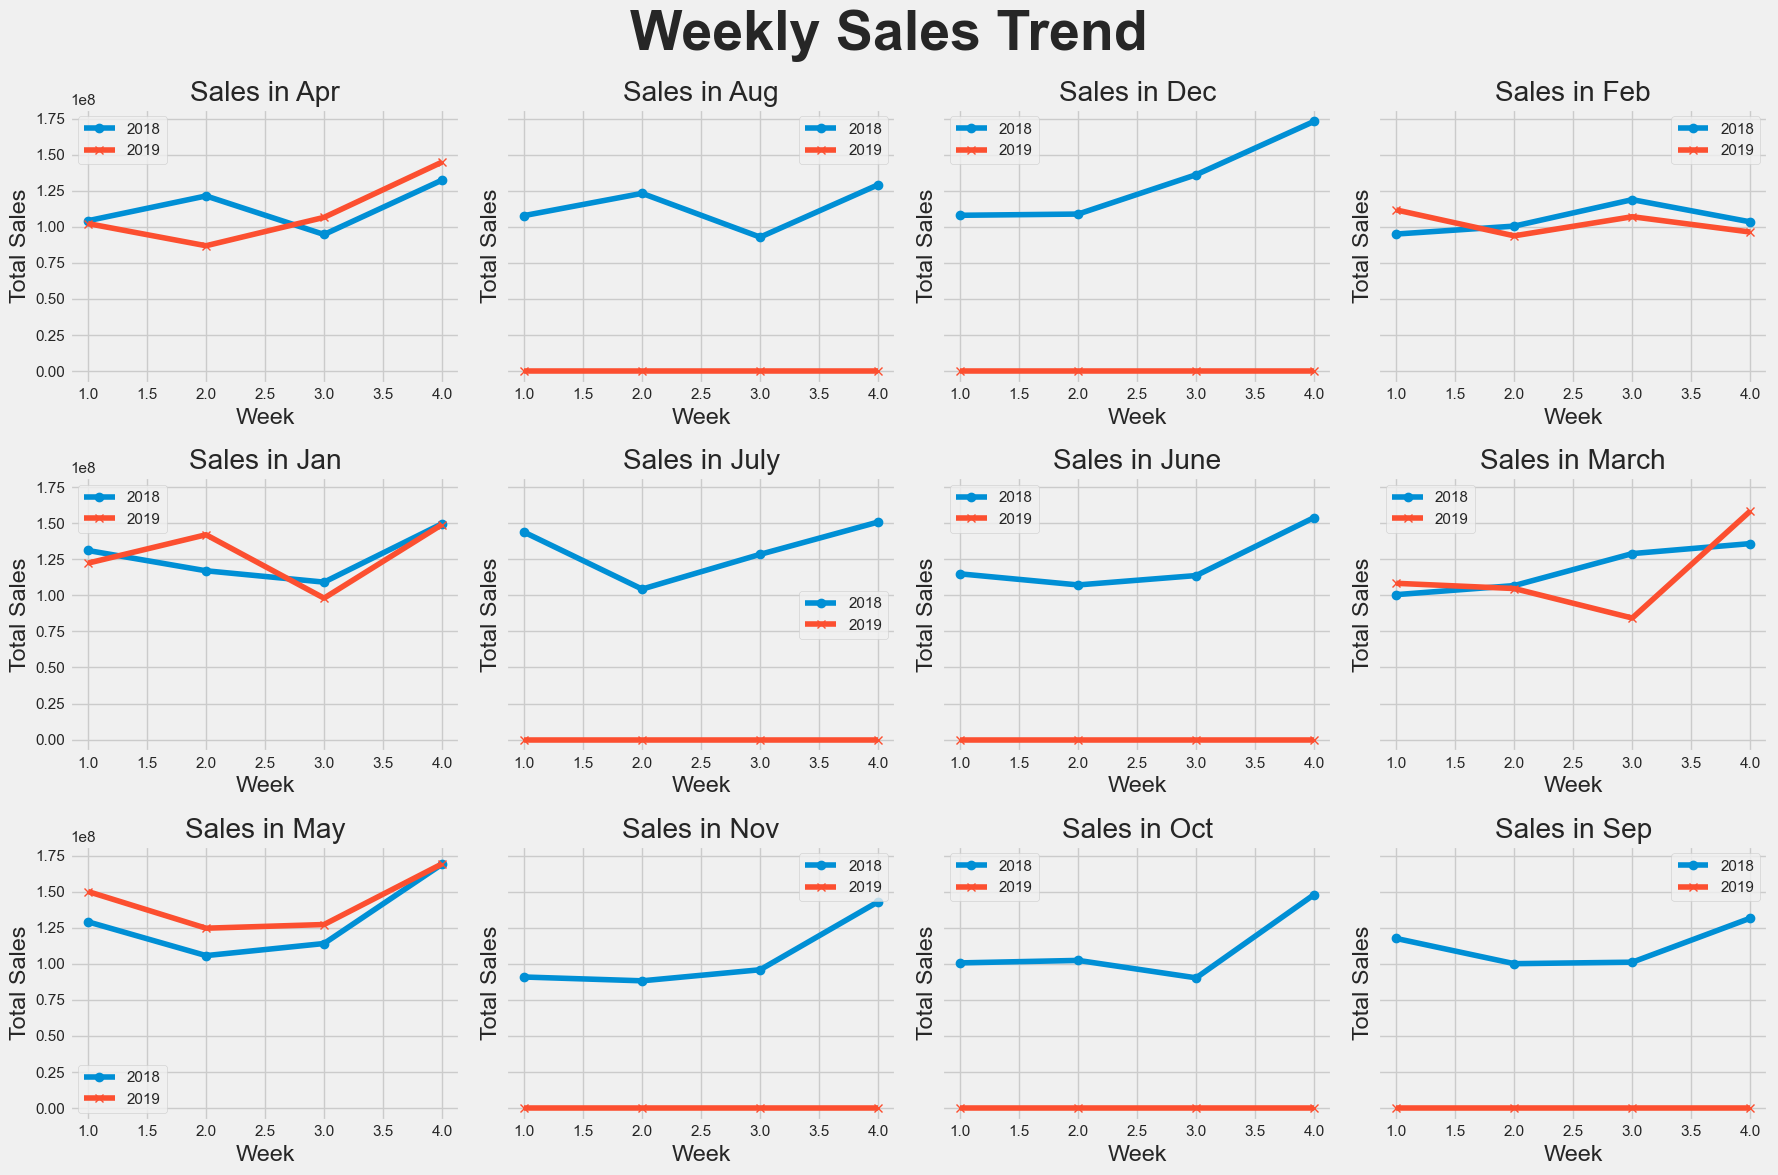

In [17]:
# Create a 'Week' column
df['Day'] = df['Day'].astype(int)
df['Week'] = np.where(df['Day'] <= 7, 1, 
                      np.where(df['Day'] <= 14, 2,
                               np.where(df['Day'] <= 21, 3, 4)))
# Turn 'week' and 'day' into categorical feature
df['Week'] = df['Week'].astype('object')
df['Day'] = df['Day'].astype('object')


#  Aggregate the sum of sales by month, week, and year
sales_trend = df.groupby(['Year', 'Month', 'Week'])['Sales'].sum().reset_index()

# Step 4: Use pivot_table to build the data for plotting
pivot_table_2018 = sales_trend[sales_trend['Year'] == 2018].pivot_table(index='Week', columns='Month', values='Sales')
pivot_table_2019 = sales_trend[sales_trend['Year'] == 2019].pivot_table(index='Week', columns='Month', values='Sales')

# Combine the pivot tables and fill missing values with 0
all_months = sorted(set(pivot_table_2018.columns).union(set(pivot_table_2019.columns)))
pivot_table_2018 = pivot_table_2018.reindex(columns=all_months).fillna(0)
pivot_table_2019 = pivot_table_2019.reindex(columns=all_months).fillna(0)

# Define the number of plots per line
plots_per_line = 4
num_months = len(all_months)

# Calculate the number of rows needed
num_rows = (num_months + plots_per_line - 1) // plots_per_line

# Create subplots with specified layout
fig, axes = plt.subplots(num_rows, plots_per_line, figsize=(18, num_rows * 4), sharey=True)

# Flatten axes if it's a single row
axes = axes.flatten()

# Plotting individual plots for each month
for i, month in enumerate(all_months):
    ax = axes[i]
    
    # Plot data for 2018
    if month in pivot_table_2018.columns:
        ax.plot(pivot_table_2018.index, pivot_table_2018[month], label='2018', marker='o')
    
    # Plot data for 2019
    if month in pivot_table_2019.columns:
        ax.plot(pivot_table_2019.index, pivot_table_2019[month], label='2019', marker='x')
    
    ax.set_title('Sales in {}'.format(month))
    ax.set_xlabel('Week')
    ax.set_ylabel('Total Sales')
    ax.legend()
    ax.grid(True)

# Remove empty subplots
for i in range(num_months, len(axes)):
    fig.delaxes(axes[i])
    
# Add big title to the entire figure
fig.suptitle('Weekly Sales Trend', fontsize=40, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()


#### Insights:
The analysis of weekly sales trends highlights a significant increase in sales during the 3rd and 4th weeks of most months, particularly in April, August, and December. In contrast, February does not exhibit this pronounced rise; instead, sales remain relatively steady throughout the month. This observed trend suggests that financial factors, such as end-of-month paydays, might contribute to higher spending in the latter weeks of the month.

## Average Sales by Regional, Location, and Store Type

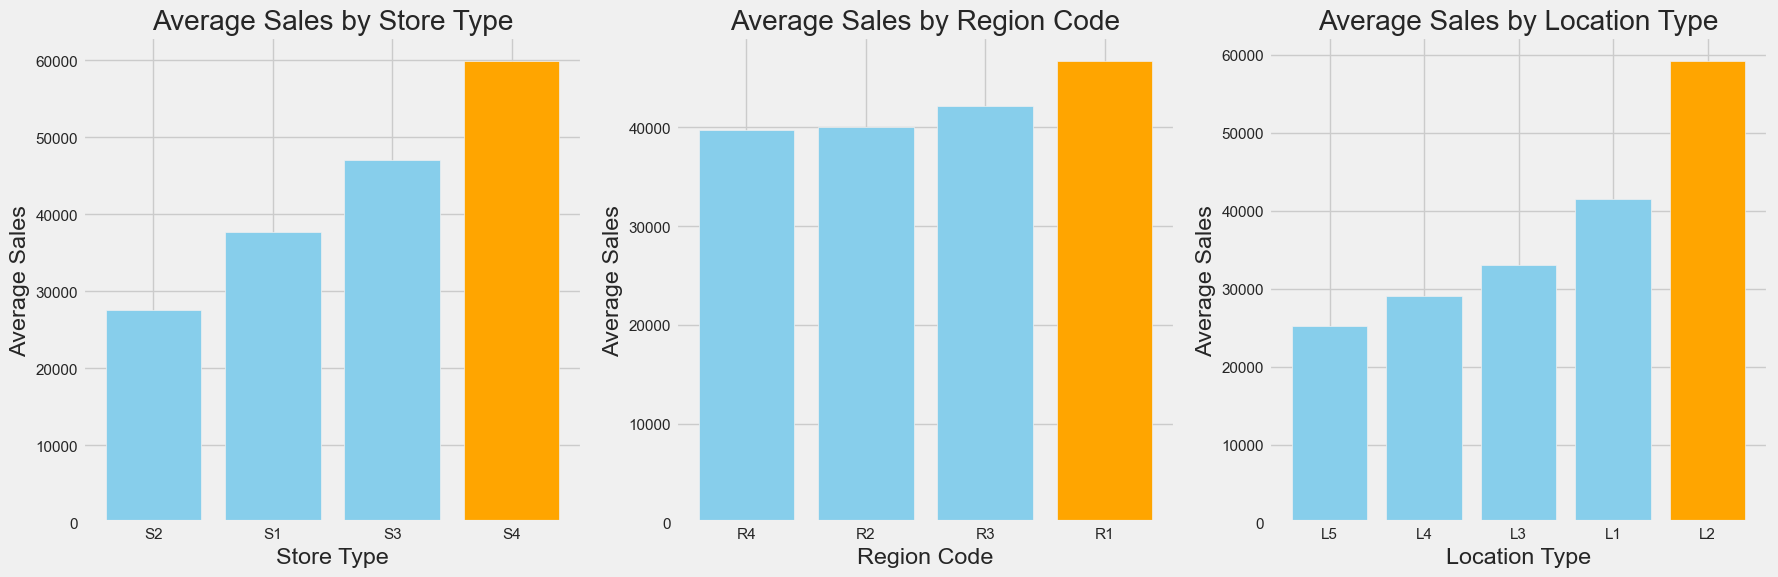

In [20]:
# Group by 'Store_Type' and calculate avg of 'Sales'
sales_by_store_type = df.groupby('Store_Type')['Sales'].mean().sort_values(ascending=True)

# Group by 'Region_Code' and calculate avg of 'Sales'
sales_by_region = df.groupby('Region_Code')['Sales'].mean().sort_values(ascending=True)

# Group by 'Location_Type' and calculate avg of 'Sales'
sales_by_location = df.groupby('Location_Type')['Sales'].mean().sort_values(ascending=True)

# Plotting side-by-side vertical bar charts in a straight line
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for three subplots

# Plotting average sales by store type
max_sales_store_type = sales_by_store_type.max()
highlight_color_store_type = ['skyblue' if sales != max_sales_store_type else 'orange' for sales in sales_by_store_type]
axes[0].bar(sales_by_store_type.index, sales_by_store_type.values, color=highlight_color_store_type)
axes[0].set_xlabel('Store Type')
axes[0].set_ylabel('Average Sales')
axes[0].set_title('Average Sales by Store Type')
axes[0].grid(True)

# Plotting average sales by region
max_sales_region = sales_by_region.max()
highlight_color_region = ['skyblue' if sales != max_sales_region else 'orange' for sales in sales_by_region]
axes[1].bar(sales_by_region.index, sales_by_region.values, color=highlight_color_region)
axes[1].set_xlabel('Region Code')
axes[1].set_ylabel('Average Sales')
axes[1].set_title('Average Sales by Region Code')
axes[1].grid(True)

# Plotting average sales by location type
max_sales_location = sales_by_location.max()
highlight_color_location = ['skyblue' if sales != max_sales_location else 'orange' for sales in sales_by_location]
axes[2].bar(sales_by_location.index, sales_by_location.values, color=highlight_color_location)
axes[2].set_xlabel('Location Type')
axes[2].set_ylabel('Average Sales')
axes[2].set_title('Average Sales by Location Type')
axes[2].grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()


#### Insights:
Regarding store type performance, the data indicates that store type 'S4' generates the highest average sales compared to other types. Additionally, the regional analysis highlights that region codes 'R1' and 'R3' demonstrate the strongest sales, suggesting these geographic areas are company's top-performing markets. Furthermore, the data on location type shows that stores situated in 'L2' type locations achieve the highest average sales, while 'L5' location underperforms.

## Average Order Value accross different Store 

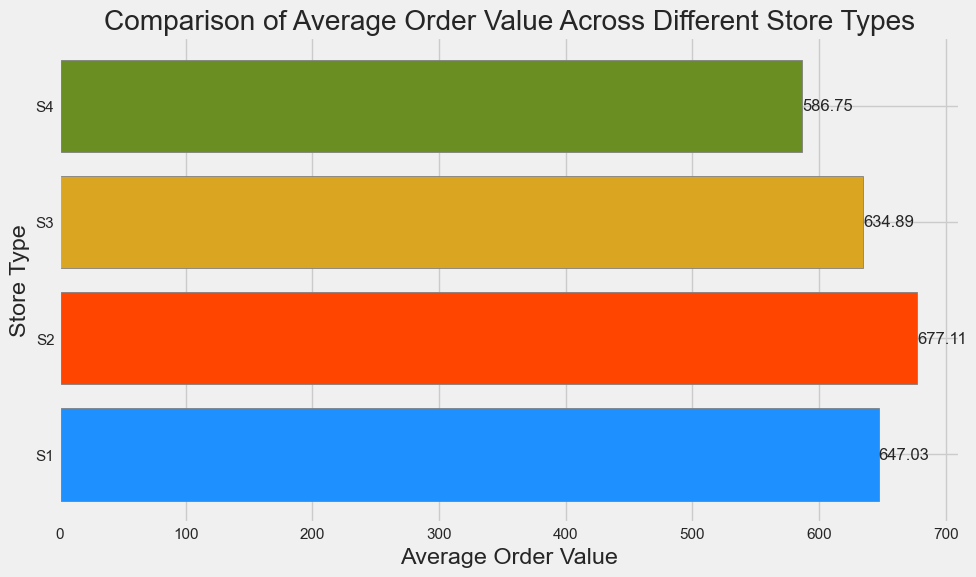

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains the columns 'Store_Type', 'Sales', and '#Order'

# Calculate the average order value for each store type
df['Order_Value'] = df['Sales'] / df['#Order']
average_order_value = df.groupby('Store_Type')['Order_Value'].mean().reset_index()

# Define colors for each store type
colors = ['dodgerblue', 'orangered', 'goldenrod', 'olivedrab']

# Plotting the horizontal bar chart with specific colors
plt.figure(figsize=(10, 6))
bars = plt.barh(average_order_value['Store_Type'], average_order_value['Order_Value'], color=colors, edgecolor='grey', linewidth=0.6)

# Adding labels on the right side of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=12)

# Adding labels and title
plt.xlabel('Average Order Value')
plt.ylabel('Store Type')
plt.title('Comparison of Average Order Value Across Different Store Types')

# Display the plot
plt.tight_layout()
plt.show()


#### Insights: 
Upon examining the preceding chart, the ranking of average sales from highest to lowest is as follows: S4, S3, S1, and S2. Conversely, the current chart illustrates the ranking of average order value from highest to lowest as S2, S1, S3, and S4. This suggests a negative correlation between average order value and average sales, indicating that as the average order value decreases, average sales tend to increase. Stores with lower average order values may be offering more affordable products, potentially leading to a higher customer volume. In contrast, stores with higher average order values might cater to a niche market or provide premium products, which could result in lower sales volume but higher individual transaction values.

In [20]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Order_Value
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,779.093333
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,863.152000
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,877.814286
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,857.180870
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,735.718065
...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,730.823529
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,606.362667
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,564.724286
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,702.320143


## Store Count Across Locations and Regions

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_58955/1234991373.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.text(i, df_grouped.loc[region_code].cumsum()[j] - df_grouped.loc[region_code, store_type] / 2,


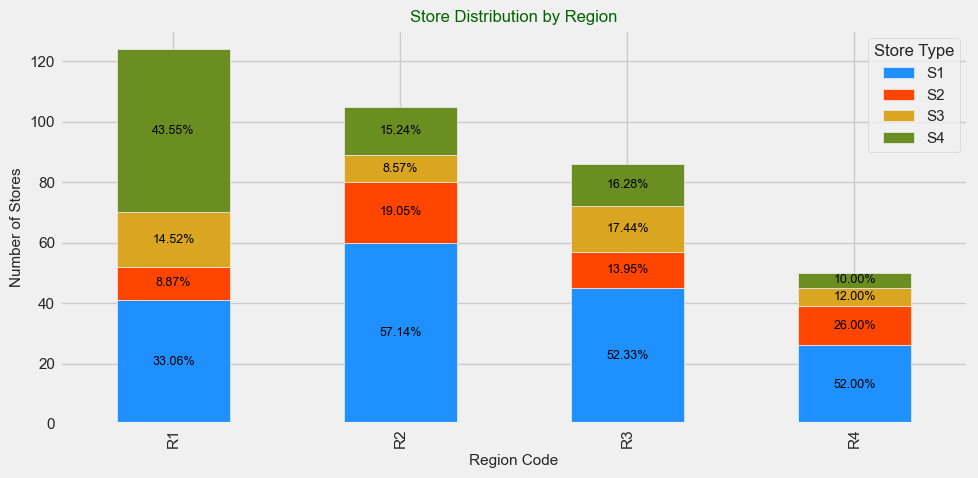

In [17]:
# Create data for the bar chart
df_grouped = df.groupby(['Region_Code', 'Store_Type'])['Store_id'].nunique().unstack()

# Create figure and axis for the bar chart only
fig, ax2 = plt.subplots(figsize=(10, 5))

# Plotting the bar chart
df_grouped.plot(kind='bar', stacked=True, ax=ax2, color=['dodgerblue', 'orangered', 'goldenrod', 'olivedrab'])

# Add title, labels, and legend
ax2.set_title('Store Distribution by Region', fontsize=12, fontweight='normal', color='darkgreen')
ax2.set_xlabel('Region Code', fontsize=11)
ax2.set_ylabel('Number of Stores', fontsize=11)
ax2.legend(title='Store Type')

# Add percentage text for each Store Type
for i, region_code in enumerate(df_grouped.index):
    total_stores = df_grouped.loc[region_code].sum()
    for j, store_type in enumerate(df_grouped.columns):
        percentage = df_grouped.loc[region_code, store_type] / total_stores * 100
        ax2.text(i, df_grouped.loc[region_code].cumsum()[j] - df_grouped.loc[region_code, store_type] / 2,
                 f'{percentage:.2f}%', ha='center', va='center', color='black', fontsize= 9)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Insights:
As we have seen, the average sales rankings from highest to lowest are Region R1, R3, R2, and R4. This trend matches the presence of stores with the highest average sales, specifically S4 and S3, in each region. Regions with a higher number of S4 and S3 stores tend to show higher average sales.

## Store sales Across Location and Regions


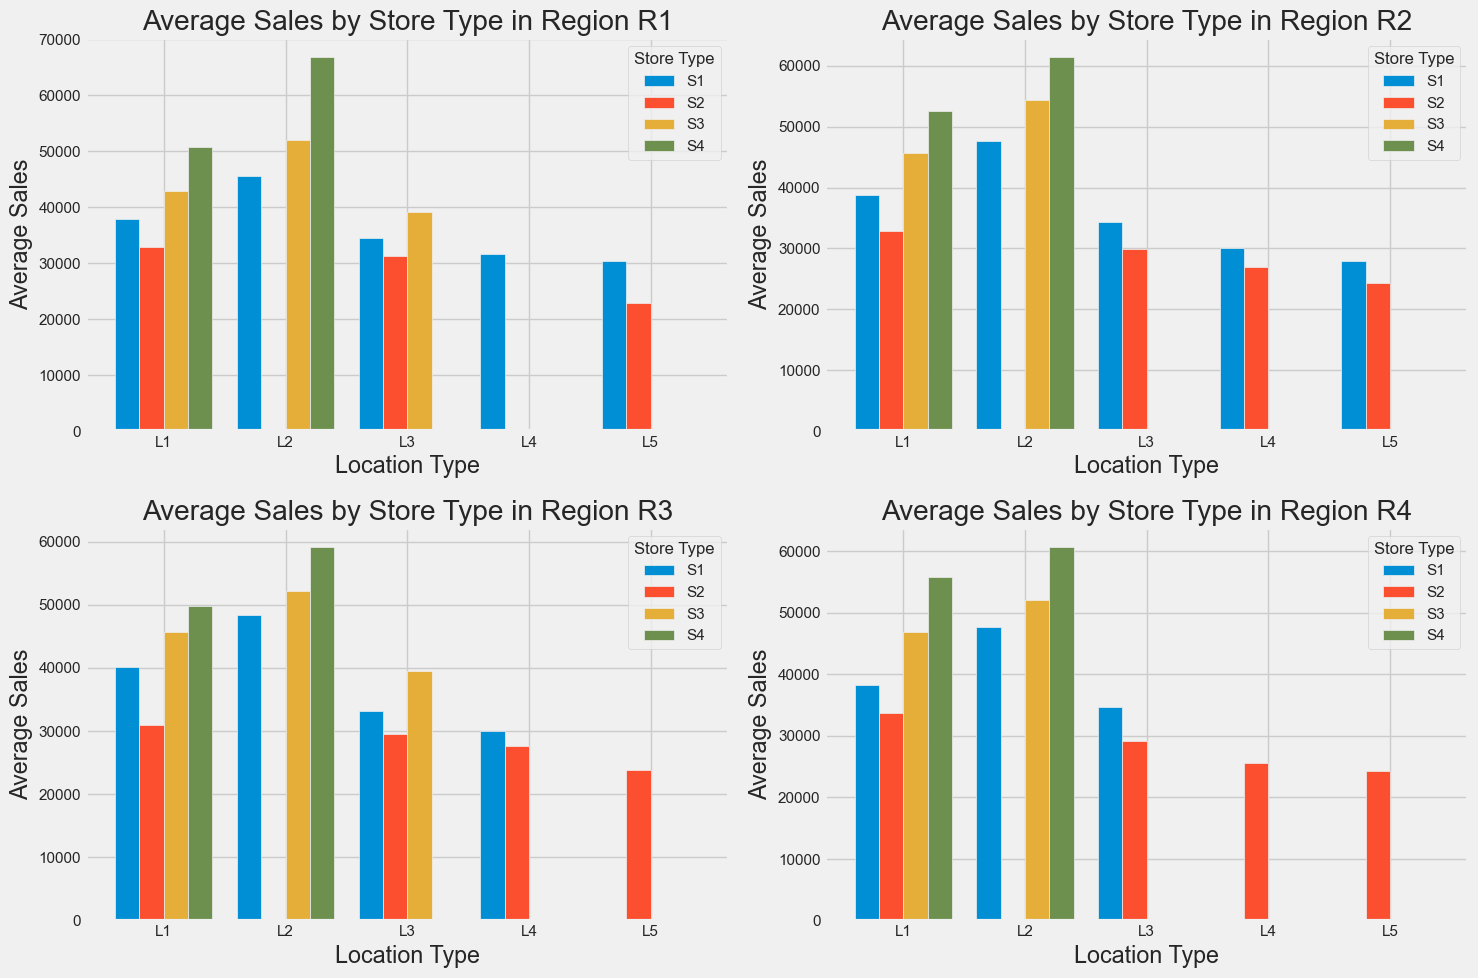

In [86]:
# List of regions
regions = ['R1', 'R2', 'R3', 'R4']

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns for four subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

for i, region in enumerate(regions):
    # Filter the DataFrame for the current region
    df_region = df[df['Region_Code'] == region]
    
    # Group by Location_Type and Store_Type, then calculate average Sales
    location_type_avg_sales = df_region.groupby(['Location_Type', 'Store_Type'])['Sales'].mean().reset_index()
    
    # Pivot the table to have Store_Type as columns
    pivot_table = location_type_avg_sales.pivot(index='Location_Type', columns='Store_Type', values='Sales').fillna(0)
    
    # Plotting on the current subplot
    location_types = pivot_table.index
    store_types = pivot_table.columns
    width = 0.2  # Width of the bars
    
    # Calculate bar positions
    bar_positions = np.arange(len(location_types))
    
    for j, store_type in enumerate(store_types):
        # Adjust bar positions for each store type
        offset = width * (j - (len(store_types) - 1) / 2)
        axes[i].bar(bar_positions + offset, pivot_table[store_type], width=width, label=store_type)
    
    axes[i].set_xlabel('Location Type')
    axes[i].set_ylabel('Average Sales')
    axes[i].set_title(f'Average Sales by Store Type in Region {region}')
    axes[i].set_xticks(bar_positions)
    axes[i].set_xticklabels(location_types)
    axes[i].legend(title='Store Type')

# Adjust layout and show plot
plt.tight_layout()
plt.show()



The visualization indicates that not all store types are available in every location. Store Types 3 and 4 are absent from some locations. Store Type S1 has a high store count but exhibits low performance metrics. Store Type S2 is present in all locations except L2 but has the lowest average sales.

# Business Recommendations Based on Insights:

1. **High Performing Store Expansion:** To boost overall sales, expand Store Type 4 (S4) into locations L3, L4, and L5 across all regions, as it has shown high average sales performance. Additionally, introduce Store Type 3 (S3) to locations L3, L4, and L5 in Regions R2 and R4, and to locations L4 and L5 in Regions R1 and R3. This targeted expansion leverages the success of these high-performing store types to enhance sales potential in these locations and regions.

2. **Low Performing Store Evaluation**: Evaluate Store Type S1 for potential reduction or optimization, and consider strategies to improve the performance of Store Type S2, especially in locations where it is present.

3. **Sales Strategy Based on Monthly Trends:** Since sales tend to increase at the end of the month, especially around payday weekends, the business should adjust its sales strategy to capitalize on this trend. This could involve scheduling promotions or special offers during these times to encourage higher purchases.

4. **Leverage Peak Sales Periods:** Knowing that sales peak in January, May, July, and December, the business should prepare with adequate stock and effective marketing strategies to maximize profits during these periods.

5. **Use Discounts to Boost Average Sales:** Insights indicate that discounts tend to increase average sales. Therefore, the business should consider adopting a more aggressive discount strategy to enhance sales.

---